# Data Science Research analysis for Physical Activity Monitoring (PAM) dataset

# Dataset Overview:

The physical activity monitoring(PAM) dataset comprise of 18 different physical activities performed by 9 subjects mainly employees or students at DFKI(1 female, 8 males) wearing 3 inertial measurement units (IMU) and a heart rate monitor.Detailed data on each subject was stored in individual text files. There are 54 attributes in each file, including timestamp, activity ID, heart rate, and IMU sensory data(ankle,chest and hand).

# Introduction:

The importance of physical activity for a healthy life and reducing the likelihood of developing certain diseases is widely recognized. There are many different physical activities with varying effort requirements and different health benefits.The purpose of this project is to develop hardware and/or software capable of determining the amount (by using start and end times and heart rates) and type of physical activity an individual engages in and the actionable observations we can draw from this data.Below are the various steps invloved to complete the analysis using the PAM dataset
         
 a) Data Import - Importing all the necessary libraries and files for the physical activity monitoring 
        dataset analysis
        
 b) Data Cleaning - Data collection, cleaning, and preprocessing are crucial for effective data analysis.
        This step would involve handling missing values, normalizing data, and parsing time data. Properly
        preparing the data helps to ensure accurate and meaningful results from the analysis
        
 c) Exploratory Data Analysis - After addressing the missing values and normalizing the data. I would 
        be splitting the dataset into train and test. We will be analyzing and understanding the data that focuses
        on discovering patterns and correlations in the data.
     
  d) Hypothesis Testing - Per the analysis conducted, we will be performing z test between heartrate and the activities with highest intensity.
     
  e) Modelling - Finally, we will be performing the polynomial regression and random forest algorithm
    

# Data Import:

Firstly, import all the necessary libraries for the PAM dataset analyis. In order to load all the files and create the dataframe, a list of the file names must be created. Additionally, a dictionary should be created to store the names and numbers of each activity, so that the activity being analyzed at each stage can be understood.The MET_values dictionary maps activity IDs to values representing the metabolic equivalent of the activity. Lists for each type of IMU (chest, ankle, hand) should also be compiled to obtain the column names for the dataframe. Finally, all of these lists should be combined to generate the set of columns for the dataframe

In [379]:
#Import all the required libraries for the analysis
import pandas as pd
import numpy as np
import math
from scipy import stats 
from matplotlib import pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation
from pandas.plotting import scatter_matrix
pd.options.mode.chained_assignment = None

In [380]:
# Loading the data of 9 subjects
List_of_Subjects = ['Dataset/Protocol/subject101.dat','Dataset/Protocol/subject102.dat',
                 'Dataset/Protocol/subject103.dat','Dataset/Protocol/subject104.dat',
                 'Dataset/Protocol/subject105.dat','Dataset/Protocol/subject106.dat',
                 'Dataset/Protocol/subject107.dat','Dataset/Protocol/subject108.dat',
                 'Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

subject_weights={1:83,2:78,3:92,4:95,5:73,6:69,7:86,8:87,9:65}

MET_values = {1: 1,2: 1.8,3: 1.8,4: 3.5,5: 7.5,6: 4,7: 5.5,12:8,13: 3,16: 3.5,17: 2.3,24: 9}

# Creating a dictionary for all the activities

activityIDdict = {0: 'transient', 1: 'lying',2: 'sitting', 3: 'standing',4: 'walking', 5: 'running', 6: 'cycling',
              7: 'Nordic_walking',9: 'watching_TV',10: 'computer_work',11: 'car driving', 12: 'ascending_stairs',
              13: 'descending_stairs',16: 'vacuum_cleaning',17: 'ironing',18: 'folding_laundry',19: 'house_cleaning',
              20: 'playing_soccer',24: 'rope_jumping' }
              

IMUhand = ['handTemperature', 'hand_acc16_1', 'hand_acc16_2', 'hand_acc16_3','hand_acc6_1', 'hand_acc6_2', 
           'hand_acc6_3', 'hand_gyro1', 'hand_gyro2', 'hand_gyro3','hand_magne1', 'hand_magne2', 'hand_magne3',
           'hand_orientation1', 'hand_orientation2', 'hand_orientation3', 'hand_orientation4']

IMUchest = ['chestTemperature', 'chest_acc16_1', 'chest_acc16_2', 'chest_acc16_3','chest_acc6_1', 'chest_acc6_2', 
            'chest_acc6_3','chest_gyro1', 'chest_gyro2', 'chest_gyro3','chest_magne1', 'chest_magne2', 
            'chest_magne3','chest_orientation1', 'chest_orientation2', 'chest_orientation3', 'chest_orientation4']

IMUankle = ['ankleTemperature','ankle_acc16_1', 'ankle_acc16_2', 'ankle_acc16_3', 'ankle_acc6_1', 
            'ankle_acc6_2', 'ankle_acc6_3', 'ankle_gyro1', 'ankle_gyro2', 'ankle_gyro3', 
            'ankle_magne1', 'ankle_magne2', 'ankle_magne3','ankle_orientation1', 'ankle_orientation2', 
            'ankle_orientation3', 'ankle_orientation4']

columns=["timestamp", "activityID","heartrate"]+IMUhand+IMUchest+IMUankle

len(columns)

54

DataFrame Creation: Each file in the files_list loops through and saved as CSV file that are stored in a new dataframe called phydf.A new column called subject_id is created and set to the subject ID extracted from the file name.The phydf dataframe is then appended to the pamdf dataframe using the concat function.


In [381]:
# Creating a new dataframe named pamdf using function create_dataframe
def create_dataframe(list_of_files):
    pamdf = pd.DataFrame()
    for file in list_of_files:
        df = pd.read_csv(file,sep='\s+|\s+',engine='python')
        strfile=file[17:27]+'.csv'
        df.to_csv(strfile, index=None)
        phydf=pd.read_csv(strfile)
        phydf.columns = columns
        phydf['subject_id'] = int(file[-5])
        pamdf=pd.concat([pamdf, phydf], ignore_index=True)
    return pamdf



In [382]:
pamdf=create_dataframe(List_of_Subjects)
pamdf.reset_index(drop=True, inplace=True)
pamdf.head(5)

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subject_id
0,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
1,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
2,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
3,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1
4,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0,1


In [383]:
# Displaying the last 5 rows
pamdf.tail(5)

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subject_id
2872519,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872520,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,9
2872521,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,9
2872522,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,9
2872523,100.23,0,161.0,25.1875,-4.09726,8.15642,3.29961,-4.73244,8.82870,3.54305,...,0.011866,-0.042858,-46.2704,4.21475,0.247798,0.598119,0.033685,0.800188,-0.028602,9


As demonstrated by the above pamdf dataframe, some data cleaning is necessary. For example, activityID 0 should be completely removed from our dataset, as it represents a transitional period where the subject was not performing any specific activity (as indicated in the data_info file). The data cleaning process will be performed in the following section.

# Data Cleaning

Per the data_info file, the dataset appears to have missing sensory data, due to wireless disconnections during data collection and the same are indicated with NaN. To account for this missing data and ensure that it does not impact the analysis, some data filling will be necessary. One way to address the missing values is to use interpolation, which involves constructing new data points based on known data points. Removing the columns that are not relevant for the analysis to expedite the runtime and avoid the unnecessary space.

Also, it is recommended to remove activity 0 from the data before interpolating, as it could significantly impact the output. After removing activity 0, the data can be interpolated to fill in the missing values.

In [384]:
# To Display the unique activityID
print(pamdf['activityID'].unique())

[ 0  1  2  3 17 16 12 13  4  7  6  5 24]


In [385]:
# Dropping the activityID = 0 from the dataframe
pamdf = pamdf.drop(pamdf[pamdf['activityID'] == 0].index)
pamdf.tail()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subject_id
2872006,95.06,24,NaN,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,0.522929,-0.291612,0.705786,-0.378648,9
2872007,95.07,24,NaN,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,0.003629,-0.004235,-46.0331,-0.817288,0.538134,0.522880,-0.291694,0.705895,-0.378450,9
2872008,95.08,24,NaN,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,0.522625,-0.291978,0.706161,-0.378084,9
2872009,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,0.522536,-0.291955,0.706426,-0.377733,9
2872010,95.10,24,NaN,25.125,5.00812,5.40645,5.02326,4.97362,5.45272,5.14120,...,-0.030195,0.018229,-46.1702,-0.812965,-0.313346,0.522730,-0.291275,0.706526,-0.377800,9


In [386]:
# Check if the subject_id is equal to 0 
pamdf[pamdf['subject_id']==0]

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subject_id


In [387]:
#Deletion of non numeric data
pamdf = pamdf.apply(pd.to_numeric, errors='coerce')

In [388]:
#Dropping the irrelevant coulmns 
pamdf=pamdf.drop(columns=['hand_orientation1', 'hand_orientation2', 'hand_orientation3', 'hand_orientation4',
                                     'chest_orientation1', 'chest_orientation2', 'chest_orientation3', 'chest_orientation4', 
                                     'ankle_orientation1', 'ankle_orientation2', 'ankle_orientation3', 
                                     'ankle_orientation4'],axis=1)

In [389]:
pamdf.head(10)

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
2927,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
2928,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2929,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
2930,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
2931,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
2932,37.71,1,NaN,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
2933,37.72,1,NaN,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
2934,37.73,1,NaN,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
2935,37.74,1,NaN,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
2936,37.75,1,NaN,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


In [390]:
# Performing the interpolation 
pamdf = pamdf.interpolate()

In [391]:
pamdf.isnull().sum()

timestamp           0
activityID          0
heartrate           4
handTemperature     0
hand_acc16_1        0
hand_acc16_2        0
hand_acc16_3        0
hand_acc6_1         0
hand_acc6_2         0
hand_acc6_3         0
hand_gyro1          0
hand_gyro2          0
hand_gyro3          0
hand_magne1         0
hand_magne2         0
hand_magne3         0
chestTemperature    0
chest_acc16_1       0
chest_acc16_2       0
chest_acc16_3       0
chest_acc6_1        0
chest_acc6_2        0
chest_acc6_3        0
chest_gyro1         0
chest_gyro2         0
chest_gyro3         0
chest_magne1        0
chest_magne2        0
chest_magne3        0
ankleTemperature    0
ankle_acc16_1       0
ankle_acc16_2       0
ankle_acc16_3       0
ankle_acc6_1        0
ankle_acc6_2        0
ankle_acc6_3        0
ankle_gyro1         0
ankle_gyro2         0
ankle_gyro3         0
ankle_magne1        0
ankle_magne2        0
ankle_magne3        0
subject_id          0
dtype: int64

The heartrate column still contains NaN values because the interpolation process only calculates values based on the known data points surrounding a NaN cell. Since the first few cells in the hearrate column are NaN, it is normal for the interpolation to produce more NaN values. To rectify this issue, we can assume that the values in the first 4 cells of the hearrate column are 100,based on the values after index 4 are 100. This will allow the interpolation to properly fill in the missing value

In [392]:
# Replacing a NaN value using function
def clean_data(df, fill_value):
    df = df.fillna(fill_value)
    df.reset_index(drop=True, inplace=True)
    return df

In [393]:
# Replacing NaN to 100
pamdf = clean_data(pamdf, 100)
pamdf.head(10)


,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


In [394]:
#To identify the count of null values
pamdf.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
hand_acc16_1        0
hand_acc16_2        0
hand_acc16_3        0
hand_acc6_1         0
hand_acc6_2         0
hand_acc6_3         0
hand_gyro1          0
hand_gyro2          0
hand_gyro3          0
hand_magne1         0
hand_magne2         0
hand_magne3         0
chestTemperature    0
chest_acc16_1       0
chest_acc16_2       0
chest_acc16_3       0
chest_acc6_1        0
chest_acc6_2        0
chest_acc6_3        0
chest_gyro1         0
chest_gyro2         0
chest_gyro3         0
chest_magne1        0
chest_magne2        0
chest_magne3        0
ankleTemperature    0
ankle_acc16_1       0
ankle_acc16_2       0
ankle_acc16_3       0
ankle_acc6_1        0
ankle_acc6_2        0
ankle_acc6_3        0
ankle_gyro1         0
ankle_gyro2         0
ankle_gyro3         0
ankle_magne1        0
ankle_magne2        0
ankle_magne3        0
subject_id          0
dtype: int64

Per the above summary, we do not have any missing values and the data is good to proceed with the exploratory data analysis.

# Exploratory Data Analysis(EDA)

In EDA, we are splitting the data into training and testing.This will allows us to validate the results of our analysis and ensure that our conclusions are not overly influenced by the specific data we are using.

Before dividing our data into training and testing sets, we should check if the dataframe are balanced. Because an imbalanced dataset can affect the performance of your model. If the dataframe distribution is skewed, with one dataframe much more prevalent than the other(s), the model may be biased towards the more prevalent dataframe, leading to poor performance on the minority dataframe.

In this section, we will be exploring the relationship between various physical activities and other variables by analyzing the data collected from the participants. This will include examining the different types of physical activities as well as other relevant factors such as heart rate, calories burnt, and time spent on each activity.

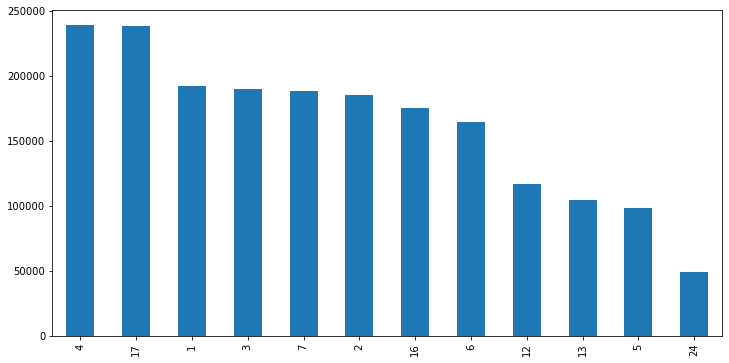

In [395]:
# To verify if the dataset is balanced
activity_counts = pamdf['activityID'].value_counts()

activity_counts.plot(kind = "bar", figsize = (12,6))
plt.show()

Per the above plot, the dataset is evenly balanced hence we are splitting the dataframe into 50% for train and 50% for test.

In [396]:
#Function to split the dataframe into train and test
def split_data(df, split_ratio):
    df = df.sample(frac=1, random_state=1) 
    split_index = int(len(df) * split_ratio)
    train_df = df.iloc[:split_index]
    test_df = df.iloc[split_index:]
    return train_df, test_df

In [397]:
#To display the length and size of the train and test data
train_df, test_df = split_data(pamdf, 0.5)
print("Length of train_df is", len(train_df))
print('Size of the data: ', train_df.size)

print("Length of test_df is", len(test_df))
print('Size of the data: ', test_df.size)


Length of train_df is 971436
Size of the data:  41771748
Length of test_df is 971436
Size of the data:  41771748


Calculating the value_counts() to identify the unique actiivtyID and its respective count for both train and test data. This would be useful for  getting a quick summary of the distribution of values  in a categorical column.

In [398]:
train_df.activityID.value_counts()


17    119647
4     119187
1      96364
3      94933
7      93861
2      92764
16     87542
6      82516
12     58763
13     52377
5      48882
24     24600
Name: activityID, dtype: int64

In [399]:
test_df.activityID.value_counts()


4     119574
17    119043
1      96159
3      94998
7      94246
2      92424
16     87811
6      82084
12     58453
13     52567
5      49317
24     24760
Name: activityID, dtype: int64

In [400]:
# Sorting the rows by index value
train_df.sort_index()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.974400,-57.750100,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.963200,-57.995700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942859,94.98,24,162.0,25.125,4.81452,6.51482,5.74788,4.89736,6.49594,5.78832,...,9.44267,-1.99702,-1.806020,-0.036682,-0.011895,-0.017897,-45.9167,-0.437698,0.254439,9
1942861,95.00,24,162.0,25.125,5.07290,6.39761,5.59819,4.94094,6.45017,5.63737,...,9.44276,-2.13311,-1.775310,0.027636,-0.024815,-0.022575,-46.2808,-1.320750,0.254182,9
1942862,95.01,24,162.0,25.125,4.95472,6.28366,5.48134,4.93917,6.35946,5.51677,...,9.39788,-2.13306,-1.729670,-0.005801,-0.007817,0.009006,-45.9034,-1.211660,-0.028281,9
1942863,95.02,24,162.0,25.125,4.80517,6.32311,5.51746,4.89281,6.22387,5.51711,...,9.48793,-2.20869,-1.745040,-0.028744,-0.061156,0.033653,-46.0452,-0.690454,-0.313048,9


Mapping the activity id to activity label:

The pamdatacop creates a copy of the train_df DataFrame, modify the activityID column using the values in the activityIDdict dictionary, and return the resulting pamdatacop.The purpose of this is to convert the activity IDs to more descriptive labels for easier interpretation.

In [401]:
pamdatacop=train_df.copy()
pamdatacop.activityID=pamdatacop.activityID.apply(lambda x:activityIDdict[x])
pamdatacop

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
312921,767.77,standing,90.000000,34.1875,-8.52981,4.712060,0.358276,-8.254460,4.955160,0.791698,...,9.716540,-1.511980,-1.006870,0.079272,-0.003718,-0.076595,-18.7246,-16.87960,36.806500,2
141735,1926.37,ascending_stairs,167.909091,33.6875,-11.23140,2.967660,2.325040,-10.353600,2.978210,2.293150,...,11.137500,-1.301760,-2.513480,-0.276670,0.669698,-0.143689,-51.7218,33.83850,-6.571620,1
1191085,3749.31,rope_jumping,181.000000,33.8125,-1.77987,3.716760,-7.388680,-0.572605,3.958700,-4.197230,...,-4.136650,-4.006830,2.162320,1.877290,-0.176273,-0.654045,-44.6465,-12.21680,0.272571,5
1206914,255.84,lying,62.000000,33.4375,4.89177,-0.216854,8.273420,5.134350,-0.344501,8.596710,...,-0.117976,-9.411680,-2.836260,-0.008012,0.002114,0.017758,-17.3221,26.44510,-4.782110,6
1710520,491.73,sitting,79.000000,34.3125,-1.96494,-9.487270,0.889387,-1.802600,-9.468570,1.058310,...,9.187270,2.903000,-2.153400,0.010209,0.011341,0.028921,-19.4371,15.82690,26.000300,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471794,3648.85,cycling,120.000000,29.7500,-6.10533,3.427980,7.365140,-6.577840,4.301450,9.142140,...,10.602400,-2.752050,-1.022720,0.154275,0.059888,0.106166,-41.1119,5.34881,8.881400,2
46078,498.44,sitting,92.000000,32.5625,-7.87425,4.095880,4.141940,-7.704180,4.138990,4.356700,...,9.135820,1.192120,-3.570340,0.063705,0.008307,0.002250,-85.4454,38.14700,16.401700,1
495388,3961.26,running,139.000000,28.8750,-5.33359,36.979800,-3.435980,-3.119450,34.862600,-2.873060,...,11.857500,5.583830,0.381641,-1.355570,1.238730,-3.278750,-51.4954,-5.78950,36.450200,2
1506095,783.52,ironing,74.000000,33.3750,2.11020,11.319200,-2.429680,2.211510,12.367400,-2.346000,...,9.890210,-0.561093,-2.660590,0.426933,-0.741163,0.191537,-33.2568,-1.96371,46.112500,7


# Analysis of time spent on activity for individual subject:

We will be conducting a more detailed analysis by examining the amount of time each subject spent on different activities.

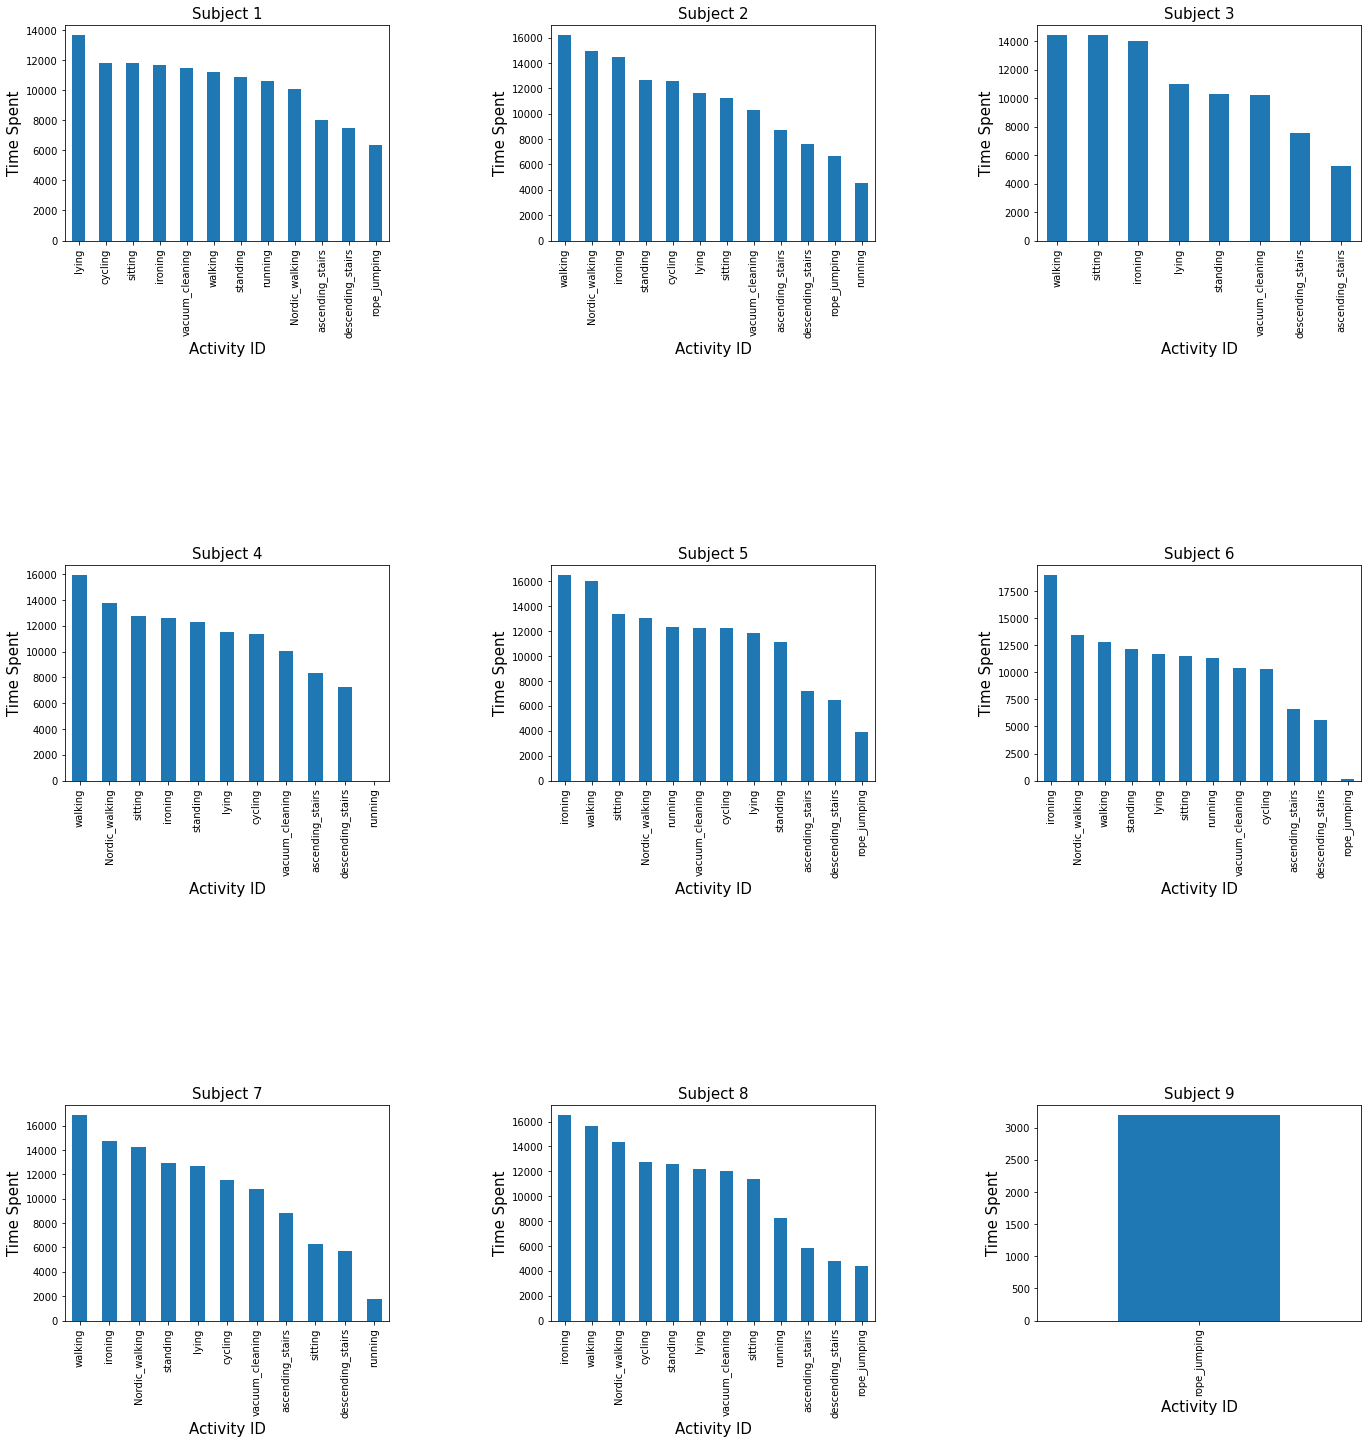

In [402]:
# Plotting the barchart using the function
def plot(df, sub, ax):
    df.activityID.value_counts().plot(kind='bar', ax=ax)
    df.activityID.agg(['value_counts'])
    ax.set_title('Subject {}'.format(sub), fontsize=15)
    ax.set_xlabel('Activity ID', fontsize=15)
    ax.set_ylabel('Time Spent', fontsize=15)
    

# Create a figure with 6 subplots arranged in a grid with 3 rows and 3 columns, with a larger size.
fig, ax = plt.subplots(3, 3, figsize=(9, 12))

# Iterate through the subject IDs
for i, sub in enumerate([1,2,3,4,5,6,7,8,9]):
    # Plot the bar chart for the subject and assign it to the appropriate subplot
    plot(pamdatacop[pamdatacop['subject_id']==sub], sub, ax[i // 3][i % 3])



# Adjust the spacing between the subplots
plt.subplots_adjust(left=0, bottom=0.5, right=2, top=2, wspace=0.5, hspace=1.5)

# Show the plot
plt.show()

In the below code, we are grouping the training dataframe by activityID and computing the mean of the grouped data 

In [403]:
df_grouped=train_df.groupby(['activityID']).mean()
df_grouped=df_grouped.reset_index()
df_grouped

,activityID,timestamp,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
0,1,205.810018,75.545557,32.728505,3.679602,2.061675,6.367305,3.791752,2.032754,6.588179,...,0.543936,-6.226228,-3.316962,0.010893,-0.005854,0.006003,-17.937375,20.577229,0.134306,4.485731
1,2,506.308536,80.047179,33.258141,-1.389341,4.295544,5.173842,-1.262264,4.294076,5.383078,...,8.809982,-0.216851,-2.089557,0.006796,-0.005329,0.005010,-22.525800,2.503881,21.125203,4.306876
2,3,733.377930,88.536730,33.637740,-7.075932,3.223117,2.675270,-6.939606,3.266560,2.893323,...,9.380298,-0.741048,-1.643213,0.004367,-0.004551,0.004309,-22.656027,-0.594149,24.427203,4.593166
3,4,2429.595921,112.779310,32.303069,-10.107593,2.515623,1.922580,-10.100182,2.545913,2.092860,...,11.959444,0.632620,-2.693545,-0.005349,-0.113771,-0.000048,-36.985424,-0.592640,15.840951,4.623625
4,5,3445.280586,156.609147,30.819405,-6.504239,6.728369,0.287698,-6.624070,6.352816,0.388420,...,13.193339,2.880917,-3.189012,0.002644,-0.100271,-0.037299,-36.532773,-8.301071,13.229515,4.663884
5,6,3128.694951,124.830549,31.009282,-5.154956,2.507518,7.122948,-5.158149,2.506534,7.262646,...,9.130031,2.129800,-1.068567,0.085572,0.038773,0.003845,-38.848188,-6.929358,12.873313,4.701040
6,7,2903.735748,123.775604,31.528332,-4.737611,5.079735,2.543156,-4.736760,5.078315,2.692999,...,12.262297,0.872126,-2.906883,-0.004517,-0.140149,0.006245,-37.386417,-0.656277,14.345998,4.851653
7,12,1806.752318,129.518261,33.528458,-8.733582,3.658778,1.603061,-8.643621,3.695112,1.801738,...,9.788651,1.604495,-2.708451,0.385221,0.133281,-0.006582,-35.736146,-4.829318,13.768898,4.402396
8,13,1905.608580,129.094747,33.323658,-6.282657,2.910228,3.656226,-6.184478,2.924561,3.853605,...,10.742766,1.154140,-2.114203,-0.405388,-0.242240,0.111473,-36.826082,-4.451120,20.214430,4.166409
9,16,1359.725161,104.182793,34.176997,-7.162320,3.575758,1.913401,-7.031500,3.595148,2.132941,...,9.563327,0.435375,-1.281936,-0.002207,0.005179,0.004223,-24.416449,4.187497,11.367237,4.550262


In [404]:
# Creating a new column named activity_name and grouping by activityID, activity_name and heartrate 

df_grouped['activity_name']=1
for i in range(len(df_grouped['activityID'])):
    df_grouped['activity_name'][i]=activityIDdict[df_grouped['activityID'][i]]

df_grouped[['activityID','activity_name','heartrate']]
    
    

,activityID,activity_name,heartrate
0,1,lying,75.545557
1,2,sitting,80.047179
2,3,standing,88.536730
3,4,walking,112.779310
4,5,running,156.609147
5,6,cycling,124.830549
6,7,Nordic_walking,123.775604
7,12,ascending_stairs,129.518261
8,13,descending_stairs,129.094747
9,16,vacuum_cleaning,104.182793


# Boxplot for heartrate v/s activities:

Creating a box plot by showing the relationship between heartrate and activity using the Seaborn library's boxplot()

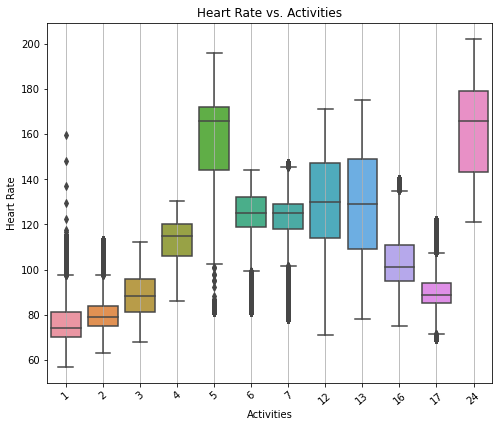

In [405]:
import seaborn as sns

# create a figure with a single subplot
fig, ax = plt.subplots(figsize=(7, 5))

# adjust the spacing between the subplots
plt.subplots_adjust(2, 1, 5, 2)
plt.subplot(131)

# create a boxplot of the data
sns.boxplot(x='activityID', y='heartrate', data=train_df[['activityID', 'heartrate']])

# rotate the x-axis labels
plt.xticks(rotation=40)

# show a grid on the x-axis
plt.grid(axis='x')

# label the x and y axes
plt.xlabel('Activities')
plt.ylabel('Heart Rate')

# add a title to the plot
plt.title('Heart Rate vs. Activities')

# show the plot
plt.show()

# Barchart representation of Activity Name and Heartrate:

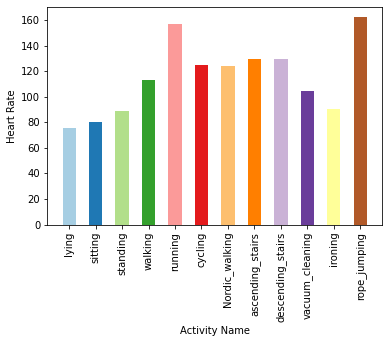

In [406]:
size = range(len(df_grouped))
plt.bar(df_grouped['activity_name'],df_grouped['heartrate'], width=0.5, color=plt.cm.Paired(size))
plt.xticks(rotation=90)
plt.xlabel("Activity Name")
plt.ylabel("Heart Rate")
plt.show()


Per the above representations, rope jumping and running are the most strenuous activities among the ones represented in the chart.

# Analysis of calories burnt v/s activities:

In this analysis, we are interested in the number of calories burnt by subjects during different activities. To calculate this, we are using the metabolic equivalent (MET) value of each activity and the weight of each subject.

In [407]:
def calorie_cal(i):
    
#Set the value of t= 60     
    T=60
# Look up MET value for the current activity
    MET=MET_values[act_sub_grp['activityID'][i]]
    
  # Look up subject weight for the current subject    
    W=subject_weights[act_sub_grp['subject_id'][i]]

   # Calculate number of calories burnt
    calories= T * MET * 3.5 * W / (200 * 60)
    
    return calories

Creating a new dataframe named act_sub_grp from train_df by grouping activityID and subjectID by applying the mean, max, and min functions to the timestamp column for each group, and adding calories burnt to that dataframe. Another dataframe calorie_act is created by grouping the activityID and subjectID of act_sub_grp and taking their mean. The activityID is then mapped to an activityName for clear interpretation of the data

In [408]:
# Group train_df by activityID and subject_id, and calculate mean, max, and min values of timestamp
act_sub_grp=train_df.groupby(['activityID','subject_id'])['timestamp'].agg([np.mean,max,min])
act_sub_grp=act_sub_grp.reset_index()
act_sub_grp['calorie_burnt']=0
# Iterate over activityID column of act_sub_grp
for i in range(len(act_sub_grp['activityID'])):
 # Calculate calorie_burnt for current activity and subject, and store in act_sub_grp
    act_sub_grp['calorie_burnt'][i]=calorie_cal(i)
    
calorie_act=act_sub_grp.groupby(['activityID','subject_id']).mean()
calorie_act=calorie_act.reset_index()
# Replace values in activityID column with corresponding descriptions using activityIDdict
calorie_act.activityID=calorie_act.activityID.apply(lambda x:activityIDdict[x])
calorie_act

,activityID,subject_id,mean,max,min,calorie_burnt
0,lying,1,174.045415,309.52,37.66,1.4525
1,lying,2,171.966434,289.49,55.20,1.3650
2,lying,3,276.886762,386.54,166.14,1.6100
3,lying,4,190.067999,305.69,75.26,1.6625
4,lying,5,223.699684,341.45,104.53,1.2775
...,...,...,...,...,...,...
86,rope_jumping,2,4178.977066,4245.68,4113.08,12.2850
87,rope_jumping,5,3714.966443,3753.50,3676.20,11.4975
88,rope_jumping,6,3622.808686,3624.05,3621.50,10.8675
89,rope_jumping,8,3844.586316,3888.41,3800.36,13.7025


In [409]:
#Group calorie_act by activityID and calculate mean value
calorie_df_grouped=calorie_act.groupby(['activityID']).mean()
calorie_df_grouped.reset_index(drop=False, inplace=True)
calorie_df_grouped

,activityID,subject_id,mean,max,min,calorie_burnt
0,Nordic_walking,4.714286,2885.966026,3020.291429,2751.590000,7.851250
1,ascending_stairs,4.500000,1807.821634,1999.022500,1615.946250,11.602500
2,cycling,4.714286,3124.079746,3241.817143,3006.704286,5.710000
3,descending_stairs,4.500000,1901.256871,2058.310000,1753.810000,4.350937
4,ironing,4.500000,1023.305778,1172.390000,874.068750,3.335719
5,lying,4.500000,206.958464,327.148750,86.527500,1.450312
6,rope_jumping,5.166667,3164.427640,3205.508333,3123.270000,11.943750
7,running,4.714286,3432.242946,3502.458571,3362.197143,10.706250
8,sitting,4.500000,499.172845,614.961250,383.506250,2.610562
9,standing,4.500000,736.287875,854.913750,617.530000,2.610562


# Boxplot for calories burnt v/s activities:

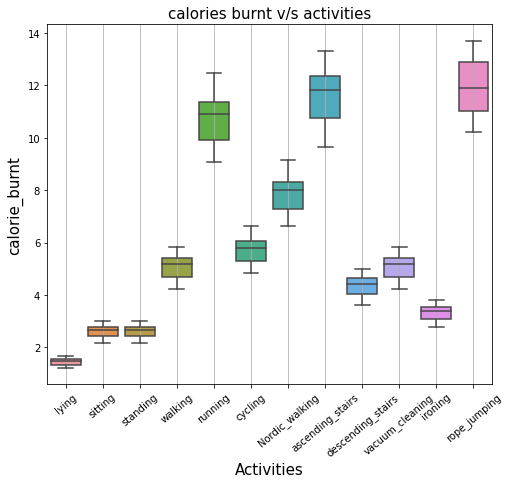

In [410]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.subplots_adjust(2,1,5,2)
plt.subplot(131)
dat1=calorie_act[['activityID','calorie_burnt']]
plt.xticks(rotation=40)
sns.boxplot(x='activityID',y='calorie_burnt',data=dat1)
plt.grid(axis='x')
plt.ylabel('calorie_burnt',fontsize=15)
plt.xlabel('Activities',fontsize=15)
plt.title('calories burnt v/s activities',fontsize=15)
plt.show()

According to the boxplot, rope jumping and ascending stairs have the highest quartile for calories burnt, while lying, sitting, and standing have the lowest values.

# Comparison of average temperature for hand,chest and ankle:

We are examining the average temperatures of different body parts (hand, chest, and ankle) while engaging in various activities.

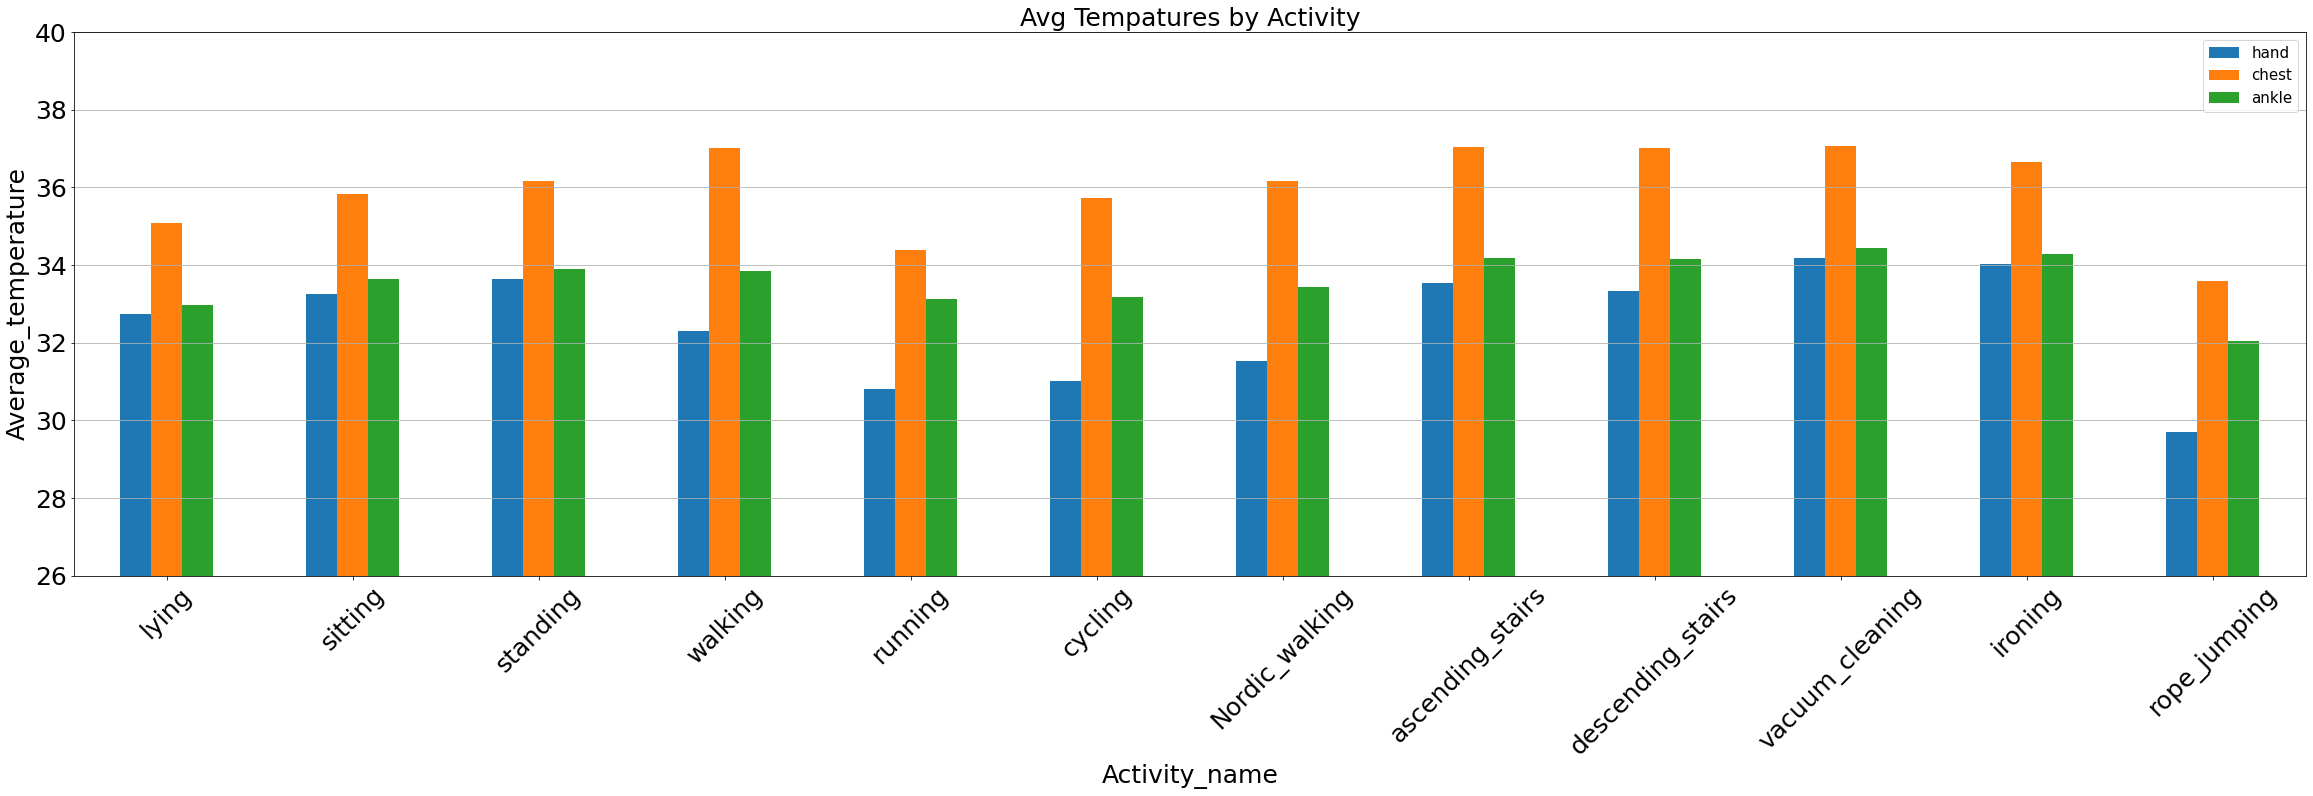

In [411]:
Avg_Temp = pd.DataFrame()
Avg_Temp['hand'] = df_grouped['handTemperature']
Avg_Temp['chest'] = df_grouped['chestTemperature']
Avg_Temp['ankle'] = df_grouped['ankleTemperature']

ax = Avg_Temp.plot(kind='bar', figsize=(40,10), title='Avg Tempatures by Activity',fontsize=25)
a = ax.set_xticklabels(df_grouped['activity_name'],rotation=45)
b = ax.legend(fontsize = 15)
c = ax.set_xticks(np.arange(len(Avg_Temp)))
plt.title('Avg Tempatures by Activity',fontsize=25)
plt.xlabel('Activity_name',fontsize=25)
plt.ylabel('Average_temperature',fontsize=25)
plt.ylim(26, 40)
plt.grid(axis='y')

Per the above bar chart, the chest temperature is significantly higher than the temperatures of the other body parts.

In [412]:
# Grouping by activity name 
df_grouped['activity_name']=1
for i in range(len(df_grouped['activityID'])):
    df_grouped['activity_name'][i]=activityIDdict[df_grouped['activityID'][i]]
df_grouped

,activityID,timestamp,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id,activity_name
0,1,205.810018,75.545557,32.728505,3.679602,2.061675,6.367305,3.791752,2.032754,6.588179,...,-6.226228,-3.316962,0.010893,-0.005854,0.006003,-17.937375,20.577229,0.134306,4.485731,lying
1,2,506.308536,80.047179,33.258141,-1.389341,4.295544,5.173842,-1.262264,4.294076,5.383078,...,-0.216851,-2.089557,0.006796,-0.005329,0.005010,-22.525800,2.503881,21.125203,4.306876,sitting
2,3,733.377930,88.536730,33.637740,-7.075932,3.223117,2.675270,-6.939606,3.266560,2.893323,...,-0.741048,-1.643213,0.004367,-0.004551,0.004309,-22.656027,-0.594149,24.427203,4.593166,standing
3,4,2429.595921,112.779310,32.303069,-10.107593,2.515623,1.922580,-10.100182,2.545913,2.092860,...,0.632620,-2.693545,-0.005349,-0.113771,-0.000048,-36.985424,-0.592640,15.840951,4.623625,walking
4,5,3445.280586,156.609147,30.819405,-6.504239,6.728369,0.287698,-6.624070,6.352816,0.388420,...,2.880917,-3.189012,0.002644,-0.100271,-0.037299,-36.532773,-8.301071,13.229515,4.663884,running
5,6,3128.694951,124.830549,31.009282,-5.154956,2.507518,7.122948,-5.158149,2.506534,7.262646,...,2.129800,-1.068567,0.085572,0.038773,0.003845,-38.848188,-6.929358,12.873313,4.701040,cycling
6,7,2903.735748,123.775604,31.528332,-4.737611,5.079735,2.543156,-4.736760,5.078315,2.692999,...,0.872126,-2.906883,-0.004517,-0.140149,0.006245,-37.386417,-0.656277,14.345998,4.851653,Nordic_walking
7,12,1806.752318,129.518261,33.528458,-8.733582,3.658778,1.603061,-8.643621,3.695112,1.801738,...,1.604495,-2.708451,0.385221,0.133281,-0.006582,-35.736146,-4.829318,13.768898,4.402396,ascending_stairs
8,13,1905.608580,129.094747,33.323658,-6.282657,2.910228,3.656226,-6.184478,2.924561,3.853605,...,1.154140,-2.114203,-0.405388,-0.242240,0.111473,-36.826082,-4.451120,20.214430,4.166409,descending_stairs
9,16,1359.725161,104.182793,34.176997,-7.162320,3.575758,1.913401,-7.031500,3.595148,2.132941,...,0.435375,-1.281936,-0.002207,0.005179,0.004223,-24.416449,4.187497,11.367237,4.550262,vacuum_cleaning


# Correlation coefficient:

Correlation coefficient is used to assess the strength of associations between data variables.In this, we are analysing the correlation coefficient for the train_df. 

In [413]:
df_correlation=train_df.copy()
df_correlation.reset_index(drop=True, inplace=True)
df_correlation

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
0,767.77,3,90.000000,34.1875,-8.52981,4.712060,0.358276,-8.254460,4.955160,0.791698,...,9.716540,-1.511980,-1.006870,0.079272,-0.003718,-0.076595,-18.7246,-16.87960,36.806500,2
1,1926.37,12,167.909091,33.6875,-11.23140,2.967660,2.325040,-10.353600,2.978210,2.293150,...,11.137500,-1.301760,-2.513480,-0.276670,0.669698,-0.143689,-51.7218,33.83850,-6.571620,1
2,3749.31,24,181.000000,33.8125,-1.77987,3.716760,-7.388680,-0.572605,3.958700,-4.197230,...,-4.136650,-4.006830,2.162320,1.877290,-0.176273,-0.654045,-44.6465,-12.21680,0.272571,5
3,255.84,1,62.000000,33.4375,4.89177,-0.216854,8.273420,5.134350,-0.344501,8.596710,...,-0.117976,-9.411680,-2.836260,-0.008012,0.002114,0.017758,-17.3221,26.44510,-4.782110,6
4,491.73,2,79.000000,34.3125,-1.96494,-9.487270,0.889387,-1.802600,-9.468570,1.058310,...,9.187270,2.903000,-2.153400,0.010209,0.011341,0.028921,-19.4371,15.82690,26.000300,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971431,3648.85,6,120.000000,29.7500,-6.10533,3.427980,7.365140,-6.577840,4.301450,9.142140,...,10.602400,-2.752050,-1.022720,0.154275,0.059888,0.106166,-41.1119,5.34881,8.881400,2
971432,498.44,2,92.000000,32.5625,-7.87425,4.095880,4.141940,-7.704180,4.138990,4.356700,...,9.135820,1.192120,-3.570340,0.063705,0.008307,0.002250,-85.4454,38.14700,16.401700,1
971433,3961.26,5,139.000000,28.8750,-5.33359,36.979800,-3.435980,-3.119450,34.862600,-2.873060,...,11.857500,5.583830,0.381641,-1.355570,1.238730,-3.278750,-51.4954,-5.78950,36.450200,2
971434,783.52,17,74.000000,33.3750,2.11020,11.319200,-2.429680,2.211510,12.367400,-2.346000,...,9.890210,-0.561093,-2.660590,0.426933,-0.741163,0.191537,-33.2568,-1.96371,46.112500,7


The function axis_reducer takes a dataframe and three column names as input and creates a new column by concatenating the values in the specified columns. It then removes the original columns from the dataframe and returns the modified dataframe.

In [414]:
def axis_reducer(df,a,b,c,d):
    ref=df.copy()
    ref[d]=1
    for i in range(len(ref[a])): 

        ref[d][i]=(ref[a][i]**2 + ref[b][i]**2 + ref[c][i]**2)**0.5

    ref=ref.drop([a,b,c], axis=1)
    
    
    
    return ref

In [415]:
# Calling the function axis_reducer and combining the various variables of hand, chest and ankle in a single column

ref=axis_reducer(df_correlation,'hand_acc16_1','hand_acc16_2','hand_acc16_3','Hand_Acceleration_16')
ref=axis_reducer(ref,'hand_acc6_1','hand_acc6_2','hand_acc6_3','Hand_Acceleration_6')
ref=axis_reducer(ref,'hand_gyro1', 'hand_gyro2', 'hand_gyro3','Hand_Gyrometer')
ref=axis_reducer(ref,'hand_magne1','hand_magne2','hand_magne3','Hand_magnetometer')

ref=axis_reducer(ref,'ankle_acc16_1','ankle_acc16_2','ankle_acc16_3','Ankle_Acceleration_16')
ref=axis_reducer(ref,'ankle_acc6_1', 'ankle_acc6_2', 'ankle_acc6_3','Ankle_Acceleration_6')
ref=axis_reducer(ref,'ankle_gyro1', 'ankle_gyro2', 'ankle_gyro3','Ankle_Gyrometer')
ref=axis_reducer(ref,'ankle_magne1','ankle_magne2','ankle_magne3','Ankle_Magnetometer')

ref=axis_reducer(ref,'chest_acc16_1', 'chest_acc16_2', 'chest_acc16_3','Chest_Acceleration_16')
ref=axis_reducer(ref,'chest_acc6_1', 'chest_acc6_2', 'chest_acc6_3','Chest_Acceleration_6')
ref=axis_reducer(ref,'chest_gyro1', 'chest_gyro2', 'chest_gyro3','Chest_Gyrometer')
ref=axis_reducer(ref,'chest_magne1', 'chest_magne2','chest_magne3','Chest_Magnetometer')
ref


,timestamp,activityID,heartrate,handTemperature,chestTemperature,ankleTemperature,subject_id,Hand_Acceleration_16,Hand_Acceleration_6,Hand_Gyrometer,Hand_magnetometer,Ankle_Acceleration_16,Ankle_Acceleration_6,Ankle_Gyrometer,Ankle_Magnetometer,Chest_Acceleration_16,Chest_Acceleration_6,Chest_Gyrometer,Chest_Magnetometer
0,767.77,3,90.000000,34.1875,37.5000,34.8125,2,9.751386,9.660047,0.164967,34.928264,9.853628,9.884888,0.110294,44.612218,10.060474,9.855084,0.084096,27.869222
1,1926.37,12,167.909091,33.6875,36.9375,34.9375,1,11.847243,11.014777,2.181952,48.546151,11.880628,11.491565,0.738707,62.156053,13.478711,12.883012,0.474735,43.174891
2,3749.31,24,181.000000,33.8125,36.4375,34.1250,5,8.460191,5.797924,4.643583,46.379032,7.628115,6.151600,1.995762,46.288600,11.259950,7.621981,2.515189,49.537940
3,255.84,1,62.000000,33.4375,35.5625,34.6250,6,9.613840,10.019164,0.062214,48.484174,10.163821,9.830463,0.019596,31.972911,9.440225,9.771592,0.034585,49.229344
4,491.73,2,79.000000,34.3125,37.6250,33.9375,8,9.729352,9.696556,0.057963,29.258687,9.926956,9.872713,0.032699,36.115194,9.970973,9.974286,0.083730,26.310660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971431,3648.85,6,120.000000,29.7500,34.7500,33.6250,2,10.162253,12.056085,0.268151,53.481398,10.488048,11.001392,0.196618,42.399025,12.667246,12.987450,0.233825,41.916091
971432,498.44,2,92.000000,32.5625,34.1875,32.9375,1,9.794678,9.770694,0.041158,56.686076,10.033660,9.880875,0.064284,95.000662,9.771799,9.806011,0.033836,74.998591
971433,3961.26,5,139.000000,28.8750,32.2500,31.7500,2,37.520111,35.119600,2.651422,56.899400,11.042984,13.112022,3.757955,63.355439,30.175062,24.763849,4.356266,53.524002
971434,783.52,17,74.000000,33.3750,36.1250,32.5625,7,11.767777,12.780731,4.275455,44.155289,10.479384,10.257184,0.876516,56.887903,10.583624,10.518973,1.351819,37.290062


# Heatmap Generation:

Heatmap is used to visually represent data in order to identify patterns and correlations. The heatmap provides a graphical representation of the data, using size and color to show multiple pieces of data in a way that is easy to understand and interpret.

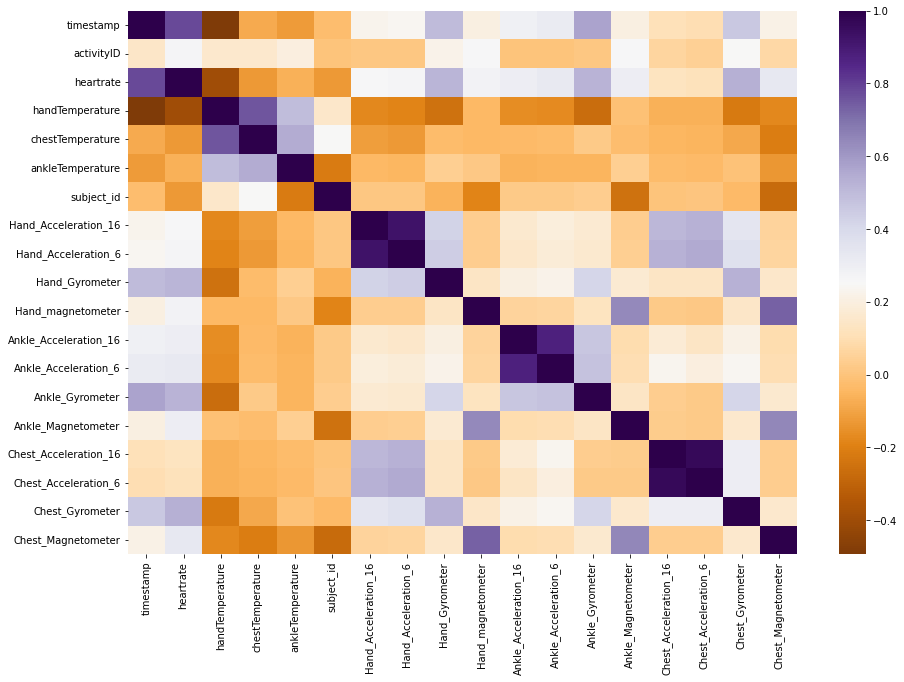

In [416]:
df_corr = ref.corr(method ='pearson')
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr,cmap = "PuOr", mask=np.zeros_like(df_corr, dtype=bool))
plt.show()

The heatmap suggests a strong correlation between heartrate and the gyrometer readings for the hand, chest, and ankle, as evidenced by the dark colors in the corresponding cells. Additionally, there is a negative correlation between the hand temperature and heartrate.

This concludes the data analysis of various attributes and proceeding to hypothesis testing.



# Hypothesis Testing:

Based on the comparison of different physical activities that have been analyzed, it has been determined that the two most intense activities are rope jumping and ascending stairs. In order to further investigate the intensity of these activities and make a decision about the true intensity level, we will be conducting a hypothesis test.

Hypothesis:
    IF, the subject is performing intense activities like rope jumping and ascending stairs 
    THEN average heartrate of the subject will be more than 105."
    
  - Independent Variable :Rope jumping and ascending stairs 
  - Dependent Variable : Average Heart rate 

  H0 : The average heartrate of the subject while performing intense activities is less than or equal to 105 (μ <= 105).
 
 H1 : Intense physical activities have an impact on the heartrate readings ie,(μ > 105).

In [417]:
ascending_stairs = train_df[train_df["activityID"] == 12]
ropejumping= train_df[train_df["activityID"] == 24]
Intense_activity=pd.DataFrame()
Intense_activity = pd.concat([Intense_activity,ascending_stairs,ropejumping], ignore_index=False)
Intense_activity

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
141735,1926.37,12,167.909091,33.6875,-11.231400,2.967660,2.325040,-10.353600,2.978210,2.293150,...,11.13750,-1.301760,-2.513480,-0.276670,0.669698,-0.143689,-51.72180,33.83850,-6.571620,1
812554,1554.29,12,149.000000,32.5625,-10.057200,5.136370,-0.204857,-9.799700,5.101200,-0.309397,...,10.93450,0.167377,-0.837120,-0.042031,-0.114733,-0.994883,-38.26050,-18.97500,-0.548117,4
1326831,1716.24,12,153.000000,33.6250,-6.199510,5.790310,4.161310,-6.227590,5.925460,4.305980,...,9.51498,-0.772813,-2.567110,0.062419,-0.087208,0.030497,-25.77890,13.95410,25.838400,6
822542,1797.06,12,115.000000,32.6250,-10.322200,2.592290,3.571520,-10.719300,2.529440,4.076400,...,9.74073,5.095370,-2.874750,0.051499,0.139639,1.070840,-6.90424,-15.04980,27.214900,4
827744,1849.08,12,150.000000,32.5625,-9.374930,1.932020,2.702730,-9.607850,1.644200,2.703030,...,17.52620,4.584040,-1.915530,-1.356800,-0.280870,-3.004700,-55.06430,-12.10490,-6.997640,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247533,3602.14,24,181.000000,30.1875,-1.027870,7.147790,-4.925800,-1.094920,6.650410,-4.489510,...,2.47699,-2.874380,-0.615926,1.523360,0.133100,2.189300,-51.87950,-34.34670,36.148700,1
511742,4230.05,24,179.000000,28.5000,0.634975,-0.968486,1.130520,1.424530,-2.712040,-0.137652,...,7.19682,1.316780,-0.230692,-0.532160,-0.233961,-1.513260,-38.23570,-1.37933,34.655900,2
1184329,3681.75,24,139.000000,33.8750,-9.025420,3.777730,1.508630,-8.812540,3.887880,1.821460,...,9.24221,0.678307,-3.236270,-0.143172,-0.223484,-0.306898,-46.12190,19.94060,9.165500,5
501024,4122.87,24,123.000000,28.3125,-0.539344,-1.067640,-10.933300,-0.241368,0.023247,-11.120200,...,5.25898,5.559860,6.713020,-0.230153,0.232471,2.192700,-36.09650,-12.53920,30.187100,2


In [418]:
Intense_activity_mean=Intense_activity['heartrate'].mean()
Intense_activity_std=Intense_activity['heartrate'].std()
Intense_activity_count=Intense_activity['heartrate'].count()
Intense_activity_count


83363

In [419]:
Intense_activity_std

25.820132755931425

In [420]:
Intense_activity_mean

139.09367431726955

In [421]:
z=(Intense_activity_mean-105)/(Intense_activity_std/np.sqrt(Intense_activity_count))
pValue=(1-stats.norm.cdf(z))

if pValue>0.1:
    
    print ("The pValue is: ",pValue, "and h1 is rejected")
else:    
    print ("The pValue is: ", pValue, "and h0 is rejected")


The pValue is:  0.0 and h0 is rejected


In this analysis, a significance level of 5% will be used to guide the decision making process. After conducting a z-test, the obtained p-value is 0.05 which means that there is only a 5% chance that the results are due to chance. Since this p-value is less than the significance level of 5%, we must reject the null hypothesis which states that the average heart rate of the subject while performing intense activities such as rope jumping and ascending stairs is less than 105 beats per minute. Instead, we will accept the alternative hypothesis, which asserts that the average heart rate is greater than 105 beats per minute.

# Modelling:

For the purpose of predicting heart rate, we will focus on the chest readings. Our exploratory data analysis showed that there is a strong correlation between heart rate and the chest_acc16_2 and chest_magne3 variables. Therefore, we will create an independent variable X that includes both chest_acc16_2 and chest_magne3 and a dependent variable Y that includes heart rate.

In [422]:
pamdf.corr()

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
timestamp,1.000000,0.143712,0.781720,-0.493674,-0.321940,0.039321,-0.215706,-0.332616,0.036865,-0.226055,...,0.343229,0.218812,0.003066,0.001594,-0.045435,-0.001125,-0.308442,-0.234251,-0.041953,-0.022949
activityID,0.143712,1.000000,0.265348,0.159352,-0.129905,0.038609,-0.116724,-0.129179,0.042104,-0.118394,...,0.144746,0.103893,0.099199,-0.004876,0.012900,0.001905,-0.199631,-0.069626,0.209897,-0.001891
heartrate,0.781720,0.265348,1.000000,-0.395932,-0.298458,0.065728,-0.268278,-0.307739,0.063252,-0.277938,...,0.297939,0.211036,-0.009076,0.001228,-0.028440,0.001550,-0.325755,-0.247339,-0.056973,-0.127993
handTemperature,-0.493674,0.159352,-0.395932,1.000000,0.059130,-0.053288,0.077812,0.073200,-0.048332,0.094127,...,-0.061476,-0.053106,-0.042125,-0.000417,0.033085,0.001882,0.092230,0.112293,0.154059,0.154094
hand_acc16_1,-0.321940,-0.129905,-0.298458,0.059130,1.000000,-0.085483,0.257433,0.978695,-0.080322,0.261275,...,-0.320398,-0.101164,-0.013885,0.038499,-0.072116,0.093352,0.084533,0.206595,-0.042602,-0.030536
hand_acc16_2,0.039321,0.038609,0.065728,-0.053288,-0.085483,1.000000,-0.067639,-0.070139,0.945219,-0.070711,...,0.060863,0.127373,0.007775,-0.004623,-0.031042,-0.037152,-0.049024,-0.096015,0.041010,-0.281382
hand_acc16_3,-0.215706,-0.116724,-0.268278,0.077812,0.257433,-0.067639,1.000000,0.254849,-0.067663,0.964548,...,-0.164375,-0.075457,0.023768,0.012820,-0.011710,0.023692,0.060863,0.108253,-0.011762,-0.002032
hand_acc6_1,-0.332616,-0.129179,-0.307739,0.073200,0.978695,-0.070139,0.254849,1.000000,-0.075857,0.258160,...,-0.314685,-0.100935,-0.013800,0.039194,-0.070733,0.082080,0.085498,0.211722,-0.039436,-0.028407
hand_acc6_2,0.036865,0.042104,0.063252,-0.048332,-0.080322,0.945219,-0.067663,-0.075857,1.000000,-0.057245,...,0.057046,0.130811,0.009622,-0.002519,-0.032122,-0.013802,-0.052534,-0.099627,0.043655,-0.299075
hand_acc6_3,-0.226055,-0.118394,-0.277938,0.094127,0.261275,-0.070711,0.964548,0.258160,-0.057245,1.000000,...,-0.170112,-0.075637,0.021927,0.012257,-0.011419,0.025473,0.062323,0.112929,-0.009647,0.003984


In [423]:
X=pamdf[['chest_acc16_2','chest_magne3']]
tar = pamdf['heartrate']

During the exploratory data analysis phase, we computed the correlation between variables and determined that there is no linear relationship between them. As a result, we cannot use linear regression for modeling. Instead, we will use polynomial regression and random forest classification for our modeling approach.

# Polynomial Regression

Polynomial regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. This is useful when the data does not fit a linear relationship.


In our case, the independent variable X includes chest_acc16_2 and chest_magne3, and the dependent variable tar is heart rate.

To fit a polynomial regression model, we first transform the independent variable X by calculating it to the nth degree polynomial, where n is set to 8. We then split the data into training and test sets using the train_test_split function. The model is fit using the X_train and y_train data, and the corresponding model is created.

To evaluate the performance of the model, we compute the root mean squared error and mean squared error. As an example, we also provide the predicted heart rate for two values of X from the dataframe."

In [424]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=8, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, tar, test_size=0.4,train_size=0.6,random_state=4798)

In [425]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [426]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print('The root mean squared error is {}'.format(poly_reg_rmse))
poly_mse=mean_squared_error(y_test, poly_reg_y_predicted)
print('The mean squared error is {}'.format(poly_mse))
poly_feat = poly.fit_transform([[1.930140,-54.463000]])
predict_heart= poly_reg_model.predict(poly_feat)
predict_heart

The root mean squared error is 20.62432356012397
The mean squared error is 425.36272231268464


array([92.5212244])

# Random Forest Algorithm

The random forest algorithm is a machine learning method that can be used for both classification and regression tasks. It is called a "random forest" because it is made up of a collection of decision trees, which are generated randomly. The more trees in the forest, the more accurate the model's predictions will be.

To use the random forest algorithm, we first create a dataframe called data by dropping the activityID and timestamp columns. We also create a target variable that includes the activityID. We then split the data into training and test sets for both data and the target variable.

Next, we import the RandomForestClassifier and create a Gaussian classifier called clf. We train the model using the training data, and then evaluate its performance by calculating the root mean squared error and the accuracy of the model."

In [427]:
data=pamdf.drop(['activityID','timestamp'], axis=1)
target = pamdf['activityID']
train_df,test_df,train_target,test_target = cross_validation.train_test_split(data,target,test_size=0.4,train_size=0.6,random_state=12345)

In [428]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_df,train_target)

y_pred=clf.predict(test_df)

In [429]:
rand_rmse = np.sqrt(mean_squared_error(test_target, y_pred))
print('The root mean squared error for Random Forest Classifier is {}'.format(rand_rmse))

The root mean squared error for Random Forest Classifier is 0.12921658888913773


In [430]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(test_target, y_pred))

Accuracy: 0.9998198543651218


In [431]:
# Testing with SubjectID

In [432]:
test=pamdf[pamdf['subject_id']==1]
test

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
0,37.66,1,100.000000,30.3750,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,100.000000,30.3750,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,100.000000,30.3750,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,100.000000,30.3750,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.000000,30.3750,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249952,3626.33,24,162.923077,30.1875,2.51550,7.02650,5.78869,2.44962,7.57075,5.77337,...,9.61441,1.92197,-0.517913,-0.018273,0.000864,0.018507,-56.3324,-29.6397,34.1311,1
249953,3626.34,24,156.230769,30.1875,2.50643,6.30465,5.67552,2.53332,6.84517,5.69937,...,9.71932,1.95217,-0.579109,-0.037873,-0.022418,-0.017999,-55.7786,-29.1093,34.2560,1
249954,3626.35,24,149.538462,30.1875,2.54102,5.84908,5.67758,2.55875,6.18058,5.80651,...,9.83979,1.89179,-0.503878,0.059283,-0.050002,0.005630,-55.5371,-29.5769,35.6106,1
249955,3626.36,24,142.846154,30.1875,2.65866,5.88715,5.79468,2.57228,5.87855,5.92796,...,9.88503,1.84648,-0.458567,0.049326,-0.016209,0.016162,-56.4328,-30.1943,34.6211,1


In [433]:
test=pamdf.iloc[[2932]]
test1=test.drop(['activityID','timestamp'], axis=1)
pred=clf.predict(test1)
pred
test1

,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,hand_gyro1,hand_gyro2,...,ankle_acc6_1,ankle_acc6_2,ankle_acc6_3,ankle_gyro1,ankle_gyro2,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,subject_id
2932,100.363636,30.6875,6.05492,4.98862,5.88707,6.13627,4.96176,5.89612,-0.019734,0.018454,...,-0.627138,-7.7219,-6.18387,0.005983,-0.039797,0.020553,-14.5606,44.6709,-7.13134,1


# Summary:

The analysis of the Physical Activity Monitoring (PAM) dataset was carried out in a five-step process. To begin, we imported all the necessary libraries and data files. Next, we performed data cleaning by dropping unnecessary columns, removing null values through the use of the interpolate method, and converting all non-numeric data to numeric format. In the Exploratory Data Analysis (EDA) phase, we verified if the dataset was balanced and divided it into training and testing sets. The following analyses were conducted as part of the EDA:

- Examination of the amount of time each subject spent on different activities
- Investigation of the relationship between heartrate and different activities, including the use of bar charts to visualize the data
- Analysis of the correlation between calorie burn and activities
- Comparison of temperatures measured at the hand, chest, and ankle
- Use of heatmaps to visualize correlations between various data points.

Based on our observations, we carried out a z-test to compare heartrate and the activities with the highest intensity, specifically rope jumping and climbing stairs. Finally, we chose to use a polynomial regression model rather than a linear regression model as the exploratory data analysis revealed that there was no linear correlation between the variables. In addition, I also applied a random forest algorithm and achieved an accuracy of 0.99 in my predictions.

Based on the analyses and information discussed above, we can develop hardware or software that can identify the quantity and type of physical activity an individual engages in using heart rates.
     
    

